In [3]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as stats
import json
from config import api_key
from pprint import pprint
import random

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
#Create url
url = "http://www.omdbapi.com/?t="

movie_key = "&apikey=" + api_key
#query_url = (url + {id_number} + api_key)
#query_url

In [5]:
movie = pd.read_csv("Movies.csv")
movie.head()

,Movie list
0,Spies in Disguise
1,Captain Marvel
2,Alien
3,Your Name.
4,Fantasy Island


In [6]:
#Pull sample of movies

#id_number=np.random.randint(1000000,9999999, size=2000)

#id_df = pd.DataFrame(id_number)
#id_df.to_csv("id_number.csv")
#id_df


#id_number_list = id_df[0]
#id_number_list

#Create lists

movie["title"] = ""
movie["awards"] = ""
movie["director"]= ""
movie["genre"] = ""
movie["year"] = ""
movie["imdbRating"] = ""
movie["ratings_rotten"] = ""
movie["rating_ metacritic"] = ""
movie["run_time"] = ""
movie["writer"] = ""

#id_number_list.dtypes


index=0
for index, row in movie.iterrows():
    #print(row[0])
    #print(f'looking for {index} for {row}')
    
    #movie_id = row['IMBD ID']
    
    try:
        query_url = (url + str(row[0]) + movie_key)
        #print(query_url)
        response = requests.get(query_url).json()
    #title.append(response["Title"][0])
    
 
    
   
        #print(f"Gettting data for {['result'][0]['Title']}.")
   #    
        movie.loc[index, 'title'] = response['Title']
        movie.loc[index, 'awards'] = response['Awards']
        movie.loc[index, 'director'] = response['Director']
        movie.loc[index, 'genre'] = response['Genre']
        movie.loc[index, 'year'] = response['Year']
        movie.loc[index, 'imdbRating'] = response['imdbRating']
        movie.loc[index, 'ratings_rotten'] = response['Ratings'][1]['Value']
        movie.loc[index, 'rating_ metacritic'] = response['Metascore']
        movie.loc[index, 'run_time'] = response['Runtime']
        movie.loc[index, 'writer'] = response['Writer']
         
    except :
        print("Not a movie... skipping.")

Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.
Not a movie... skipping.


In [7]:
response


{'Title': 'Gone Girl',
 'Year': '2014',
 'Rated': 'R',
 'Released': '03 Oct 2014',
 'Runtime': '149 min',
 'Genre': 'Drama, Mystery, Thriller',
 'Director': 'David Fincher',
 'Writer': 'Gillian Flynn (screenplay), Gillian Flynn (novel)',
 'Actors': 'Ben Affleck, Rosamund Pike, Neil Patrick Harris, Tyler Perry',
 'Plot': "With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent.",
 'Language': 'English',
 'Country': 'USA',
 'Awards': 'Nominated for 1 Oscar. Another 64 wins & 183 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTk0MDQ3MzAzOV5BMl5BanBnXkFtZTgwNzU1NzE3MjE@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.1/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '87%'},
  {'Source': 'Metacritic', 'Value': '79/100'}],
 'Metascore': '79',
 'imdbRating': '8.1',
 'imdbVotes': '823,738',
 'imdbID': 'tt2267998',
 'Type': 'movie',


In [8]:
movie.head()

,Movie list,title,awards,director,genre,year,imdbRating,ratings_rotten,rating_ metacritic,run_time,writer
0,Spies in Disguise,Spies in Disguise,3 nominations.,"Nick Bruno, Troy Quane","Animation, Adventure, Comedy, Family, Sci-Fi",2019,6.8,54/100,54,102 min,Lucas Martell (inspired by: the animated short...
1,Captain Marvel,Captain Marvel,7 wins & 46 nominations.,"Anna Boden, Ryan Fleck","Action, Adventure, Sci-Fi",2019,6.9,78%,64,123 min,"Anna Boden (screenplay by), Ryan Fleck (screen..."
2,Alien,Alien,Won 1 Oscar. Another 16 wins & 21 nominations.,Ridley Scott,"Horror, Sci-Fi",1979,8.4,98%,89,117 min,"Dan O'Bannon (screenplay by), Dan O'Bannon (st..."
3,Your Name.,Your Name.,15 wins & 25 nominations.,Makoto Shinkai,"Animation, Drama, Fantasy, Romance",2016,8.4,98%,79,106 min,"Makoto Shinkai (based on his novel), Makoto Sh..."
4,Fantasy Island,Fantasy Island,N/A,Jeff Wadlow,"Adventure, Fantasy, Horror, Mystery, Thriller",2020,4.8,8%,22,109 min,"Jillian Jacobs, Christopher Roach, Jeff Wadlow"


In [9]:
movie_short = movie[["Movie list", "genre", "director", "year", "imdbRating", "ratings_rotten", "rating_ metacritic", "run_time"]]
movie_short_rename = movie_short.rename(columns={"Movie list": "Movies",
                                                 "genre": "Genre",
                                                 "director": "Director",
                                                 "year": "Release Year", 
                                                 "imdbRating": "IMDB Rating",
                                                 "ratings_rotten": "Rotten Tomato Rating",
                                                 "rating_ metacritic": "Metacritic Rating",
                                                 "run_time": "Movie RunTime"})
movie_short_rename

,Movies,Genre,Director,Release Year,IMDB Rating,Rotten Tomato Rating,Metacritic Rating,Movie RunTime
0,Spies in Disguise,"Animation, Adventure, Comedy, Family, Sci-Fi","Nick Bruno, Troy Quane",2019,6.8,54/100,54,102 min
1,Captain Marvel,"Action, Adventure, Sci-Fi","Anna Boden, Ryan Fleck",2019,6.9,78%,64,123 min
2,Alien,"Horror, Sci-Fi",Ridley Scott,1979,8.4,98%,89,117 min
3,Your Name.,"Animation, Drama, Fantasy, Romance",Makoto Shinkai,2016,8.4,98%,79,106 min
4,Fantasy Island,"Adventure, Fantasy, Horror, Mystery, Thriller",Jeff Wadlow,2020,4.8,8%,22,109 min
5,Rambo: Last Blood,"Action, Thriller",Adrian Grunberg,2019,6.2,26/100,26,89 min
6,Feel the Beat,"Comedy, Drama, Family",Elissa Down,2020,6.4,,,
7,Fifty Shades Freed,"Drama, Romance, Thriller",James Foley,2018,4.5,12%,31,105 min
8,The Fifth Element,"Action, Adventure, Sci-Fi",Luc Besson,1997,7.7,70%,52,126 min
9,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama, Fantasy",Peter Jackson,2001,8.8,91%,92,178 min


In [10]:
movie_split_genre = movie_short_rename["Genre"].str.split(",", n=4, expand=True)
movie_split_director = movie_short_rename["Director"].str.split(",", n=1, expand=True)
movie_split_genre = movie_split_genre.rename(columns={0: "Genre 1",
                                                     1: "Genre 2",
                                                     2: "Genre 3",
                                                     3: "Genre 4",
                                                     4: "Genre 5"})
movie_split_director = movie_split_director.rename(columns={0: "Director 1",
                                                     1: "Director 2"})
                                                     
movie_split_genre

#movie_genre = movie_split_genre.groupby(["Genre 1"]).count()
movie_short_rename["Genre"] = movie_split_genre["Genre 1"]
movie_short_rename["Director"] = movie_split_director["Director 1"]

movie_short_rename

movie_clean_RT = movie_short_rename["Rotten Tomato Rating"].replace(['', '54/100', '56/100', 
                                                                     '81/100', '64/100', '68/100', '46/100', 
                                                                     '47/100', '90/100', '51/100', '72/100',
                                                                     '85/100','43/100','44/100','53/100', '26/100', 
                                                                     '48/100'], "none") 
movie_short_rename["Rotten Tomato Rating"] = movie_clean_RT


rotten_df = movie_short_rename.loc[(movie_short_rename["Rotten Tomato Rating"] != "none") &
                                  (movie_short_rename["Metacritic Rating"] != "N/A")]


rotten_df

,Movies,Genre,Director,Release Year,IMDB Rating,Rotten Tomato Rating,Metacritic Rating,Movie RunTime
1,Captain Marvel,Action,Anna Boden,2019,6.9,78%,64,123 min
2,Alien,Horror,Ridley Scott,1979,8.4,98%,89,117 min
3,Your Name.,Animation,Makoto Shinkai,2016,8.4,98%,79,106 min
4,Fantasy Island,Adventure,Jeff Wadlow,2020,4.8,8%,22,109 min
7,Fifty Shades Freed,Drama,James Foley,2018,4.5,12%,31,105 min
8,The Fifth Element,Action,Luc Besson,1997,7.7,70%,52,126 min
9,The Lord of the Rings: The Fellowship of the Ring,Action,Peter Jackson,2001,8.8,91%,92,178 min
11,Maleficent: Mistress of Evil,Adventure,Joachim Rønning,2019,6.6,40%,43,119 min
13,The Hobbit: An Unexpected Journey,Adventure,Peter Jackson,2012,7.8,64%,58,169 min
14,Terminator Genisys,Action,Alan Taylor,2015,6.4,27%,38,126 min


In [59]:


IMDB_numeric = rotten_df["IMDB Rating"].astype(float)*10
IMDB_numeric

metacritic_numeric = rotten_df["Metacritic Rating"].astype(float)
metacritic_numeric

rotten_split = rotten_df["Rotten Tomato Rating"].str.split("%", n=2, expand=True)
rotten_numeric= rotten_split[0].astype(float)
rotten_numeric



director_df = pd.DataFrame({"Director": rotten_df["Director"],
                            "IMDB Rating": IMDB_numeric,
                            "Metacritic Rating": metacritic_numeric,
                           "Rotten Tomato Rating": rotten_numeric,
                           })

director_df



,Director,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
1,Anna Boden,69.0,64.0,78.0
2,Ridley Scott,84.0,89.0,98.0
3,Makoto Shinkai,84.0,79.0,98.0
4,Jeff Wadlow,48.0,22.0,8.0
7,James Foley,45.0,31.0,12.0
8,Luc Besson,77.0,52.0,70.0
9,Peter Jackson,88.0,92.0,91.0
11,Joachim Rønning,66.0,43.0,40.0
13,Peter Jackson,78.0,58.0,64.0
14,Alan Taylor,64.0,38.0,27.0


In [60]:
movie_director = director_df.groupby(["Director"]).count()
movie_director.reset_index(level=0, inplace=True)
movie_director_clean =  movie_director.loc[(movie_director["IMDB Rating"] != 1)]
movie_director_clean                    

,Director,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
9,Anthony Russo,3,3,3
11,Barry Sonnenfeld,2,2,2
14,Bong Joon Ho,2,2,2
20,Chris Buck,2,2,2
21,Chris Columbus,2,2,2
22,Christopher Nolan,4,4,4
28,David Fincher,3,3,3
31,David Yates,4,4,4
41,Frank Darabont,2,2,2
46,Hayao Miyazaki,3,3,3


In [72]:
director_df = pd.DataFrame({"Director": movie_director_clean["Director"],
                            "Genre": rotten_df["Genre"],
                            "IMDB Rating": IMDB_numeric,
                            "Metacritic Rating": metacritic_numeric,
                           "Rotten Tomato Rating": rotten_numeric,
                           })

director_df
director_clean_df = director_df.loc[(director_df["Director"] != "NaN")]
director_final = director_clean_df.dropna()
director_final.reset_index(level=0, inplace=True)
director_final_cut = director_final[["Director", "Genre",
                                        "IMDB Rating",
                                        "Metacritic Rating",
                                        "Rotten Tomato Rating",
                                        ]]
director_final_cut

,Director,Genre,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
0,Anthony Russo,Action,88.0,92.0,91.0
1,Barry Sonnenfeld,Adventure,66.0,43.0,40.0
2,Bong Joon Ho,Action,64.0,38.0,27.0
3,Chris Buck,Action,66.0,47.0,64.0
4,Chris Columbus,Animation,71.0,69.0,78.0
5,Christopher Nolan,Action,77.0,66.0,84.0
6,David Fincher,Action,68.0,41.0,32.0
7,Frank Darabont,Biography,73.0,76.0,97.0
8,Hayao Miyazaki,Comedy,79.0,82.0,97.0
9,Jon Watts,Adventure,86.0,74.0,72.0


In [13]:
len(movie_director)

115

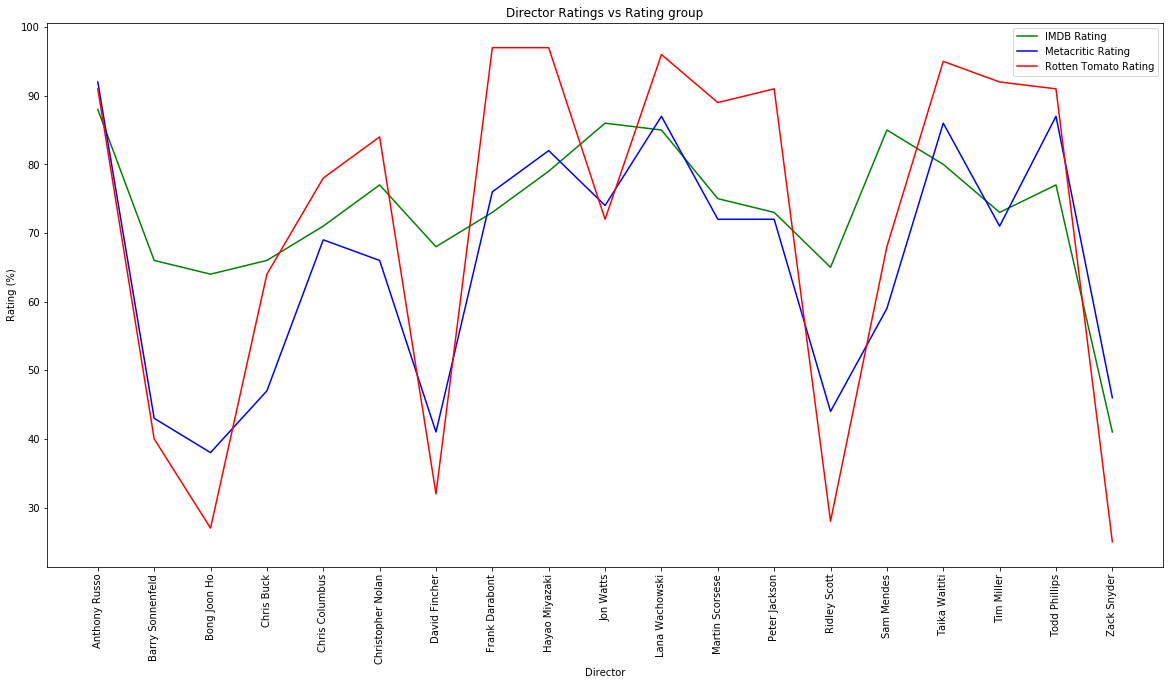

In [62]:

plt.figure(figsize=(20,10))
# Plot our line that will be used to compare Directors' IMDB Rating
plt.plot(director_final_cut["Director"], director_final_cut["IMDB Rating"], color="green", label="IMDB Rating")

# Plot our line that will be used to compare Directors' Metacritic Rating
plt.plot(director_final_cut["Director"],director_final_cut["Metacritic Rating"], color="blue", label="Metacritic Rating")
                                    
# Plot our line that will be used to compare Directors' Rotten Tomato Score
plt.plot(director_final_cut["Director"], director_final_cut["Rotten Tomato Rating"], color="red", label="Rotten Tomato Rating")            

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Director Ratings vs Rating group")
plt.xlabel("Director")
plt.xticks(director_final_cut["Director"], rotation="vertical")
plt.ylabel("Rating (%)")
plt.savefig("Director Ratings vs Rating group")
# Print our chart to the screen
plt.show()

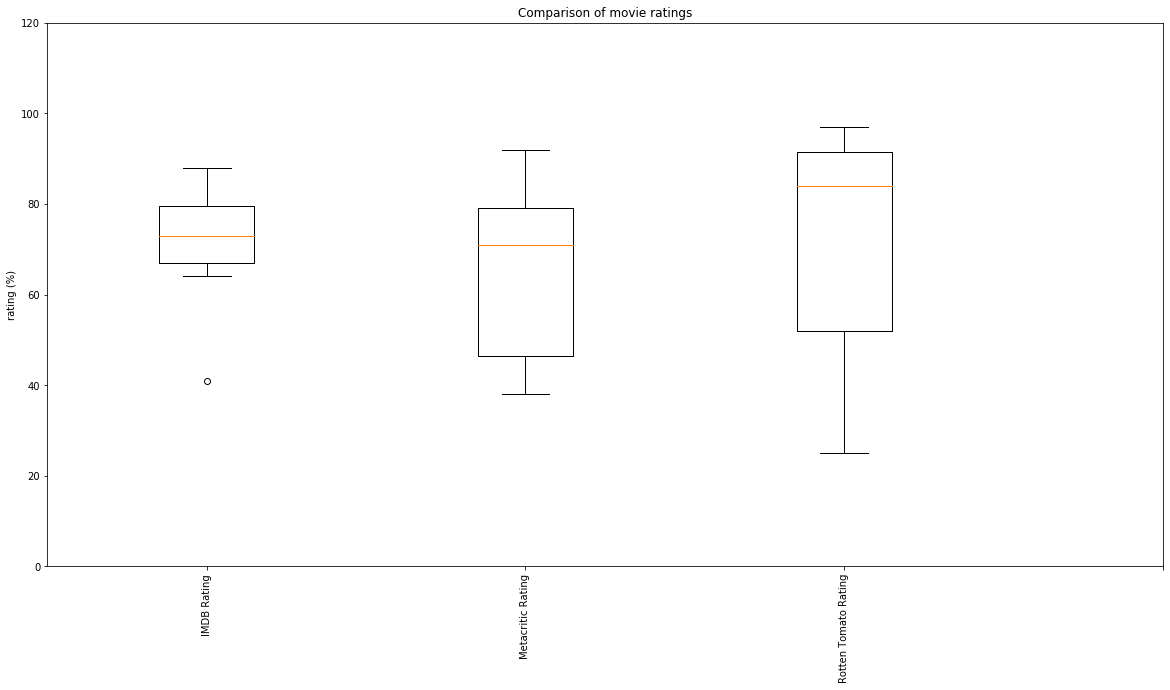

In [63]:
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Comparison of movie ratings')
ax1.set_ylabel('rating (%)')
ax1.boxplot([director_final_cut["IMDB Rating"], director_final_cut["Metacritic Rating"], director_final_cut["Rotten Tomato Rating"]])
plt.xticks([1, 2, 3, 4], ["IMDB Rating", "Metacritic Rating", "Rotten Tomato Rating"], rotation="vertical",)
plt.ylim(0,120)

plt.savefig("Comparison of movie ratings")

plt.show()

In [67]:
genre_df = pd.DataFrame({"Genre": rotten_df["Genre"],
                            "IMDB Rating": IMDB_numeric,
                            "Metacritic Rating": metacritic_numeric,
                           "Rotten Tomato Rating": rotten_numeric,
                           })
genre_df
#movie_type = rotten_df.groupby(["Genre"]).mean()
#movie_director.reset_index(level=0, inplace=True)
#movie_director_clean =  movie_director.loc[(movie_director["IMDB Rating"] != 1)]
#movie_type

,Genre,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
1,Action,69.0,64.0,78.0
2,Horror,84.0,89.0,98.0
3,Animation,84.0,79.0,98.0
4,Adventure,48.0,22.0,8.0
7,Drama,45.0,31.0,12.0
8,Action,77.0,52.0,70.0
9,Action,88.0,92.0,91.0
11,Adventure,66.0,43.0,40.0
13,Adventure,78.0,58.0,64.0
14,Action,64.0,38.0,27.0


In [68]:
movie_type = genre_df.groupby(["Genre"]).mean()
#movie_director.reset_index(level=0, inplace=True)
#movie_director_clean =  movie_director.loc[(movie_director["IMDB Rating"] != 1)]
movie_type

,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
Genre,,,
Action,72.319444,63.166667,70.902778
Adventure,75.888889,69.000000,74.277778
Animation,77.315789,76.736842,89.000000
Biography,78.428571,78.714286,93.000000
Comedy,70.833333,64.583333,71.500000
Crime,86.666667,75.666667,84.166667
Drama,74.000000,70.888889,76.888889
Horror,65.750000,66.750000,66.750000


In [21]:
movie_group = movies_df.groupby(["Movies"]).mean()
movie_group.reset_index(level=0, inplace=True)
movie_group

,Movies,IMDB Rating,Metacritic Rating,Rotten Tomato Rating
0,1917,83.0,78.0,89.0
1,21 Bridges,66.0,51.0,52.0
2,7500,62.0,58.0,68.0
3,Ad Astra,66.0,80.0,84.0
4,Aladdin,80.0,86.0,95.0
5,Alien,84.0,89.0,98.0
6,Alien: Covenant,64.0,65.0,65.0
7,Alita: Battle Angel,73.0,53.0,61.0
8,Angel Has Fallen,64.0,45.0,39.0
9,Avatar,78.0,83.0,82.0


KeyError: 'Movies'

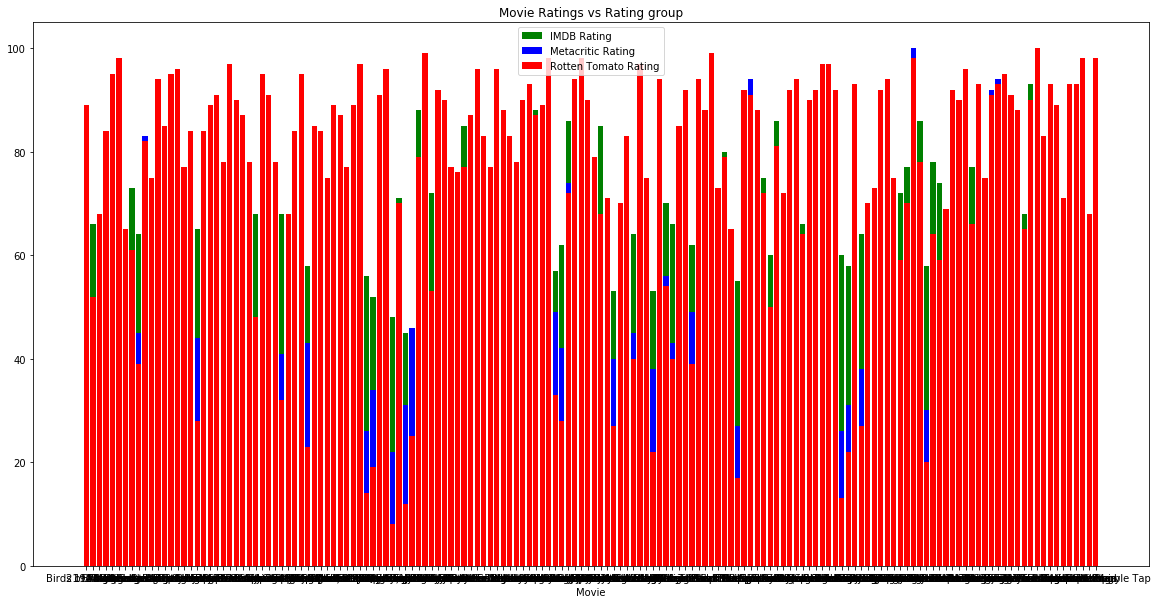

In [27]:
plt.figure(figsize=(20,10))
# Plot our line that will be used to compare Directors' IMDB Rating
plt.bar(movie_group["Movies"], movie_group["IMDB Rating"], color="green", label="IMDB Rating")

# Plot our line that will be used to compare Directors' Metacritic Rating
plt.bar(movie_group["Movies"], movie_group["Metacritic Rating"], color="blue", label="Metacritic Rating")
                                    
# Plot our line that will be used to compare Directors' Rotten Tomato Score
plt.bar(movie_group["Movies"], movie_group["Rotten Tomato Rating"], color="red", label="Rotten Tomato Rating")            

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Movie Ratings vs Rating group")
plt.xlabel("Movie")
plt.xticks(movie_director["Movies"], rotation="vertical")
plt.ylabel("Rating (%)")
plt.savefig("Movie Ratings vs Rating group")
# Print our chart to the screen
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
# Plot our line that will be used to compare Directors' IMDB Rating
plt.plot(movie_director["Movies"], movie_director["IMDB Rating"], color="green", label="IMDB Rating")

# Plot our line that will be used to compare Directors' Metacritic Rating
plt.plot(movie_director["Movies"], movie_director["Metacritic Rating"], color="blue", label="Metacritic Rating")
                                    
# Plot our line that will be used to compare Directors' Rotten Tomato Score
plt.plot(movie_director["Movies"], movie_director["Rotten Tomato Rating"], color="red", label="Rotten Tomato Rating")            

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Director Ratings vs Rating group")
plt.xlabel("Director")
plt.xticks(movie_director["Director"], rotation="vertical")
plt.ylabel("Rating (%)")
plt.savefig("Director Ratings vs Rating group")
# Print our chart to the screen
plt.show()